In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from SpikyNet import Model

In [2]:
dt = 0.1    # Timestep (ms).

net = Model(dt=dt, verbose=0)


w_PyrPyr = 20.
w_PyrSom = 10.
w_SomPyr = 185.


net.add_Population(name='Pyr', N=100, type='LIF', tau_m=0, C=107, R=177, tau_ref=4.6, Vth=-47.2, Vrest=-75.5, Vreset=-75.5)
net.add_Population(name='SOM', N=10, type='LIF', tau_m=0, C=71, R=226, tau_ref=2.1, Vth=-46, Vrest=-71.5, Vreset=-71.5)

net.add_Connection(pre='Pyr', post='Pyr', 
                   connect_ratio=10, reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=0.1, tau_psc=40, mean=w_PyrPyr, std=int(w_PyrPyr*.2))

net.add_Connection(pre='Pyr', post='SOM', 
                   connect_ratio=100, reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=0.1, tau_psc=40, mean=w_PyrSom, std=int(w_PyrSom*.2))

net.add_Connection(pre='SOM', post='Pyr', 
                   connect_ratio=100, reverse=True, sign=-1, learning=0, 
                   ordered=False, g_syn=0.1, tau_psc=40, mean=w_SomPyr, std=int(w_SomPyr*.2))


net.summary()

 Populations Information 


Pyr        SOM
Number of Neurons      100.000000  10.000000
Membrane Taus (s)        0.018939   0.016046
Refractory Period (s)    0.004600   0.002100
Spike Threshold (V)     -0.047200  -0.046000



 Connectivity Matrix 


Pyr  SOM
Pyr   10  100
SOM -100    0



 Synaptic Taus (s) 


Pyr   SOM
Pyr  0.04  0.04
SOM  0.04  0.00

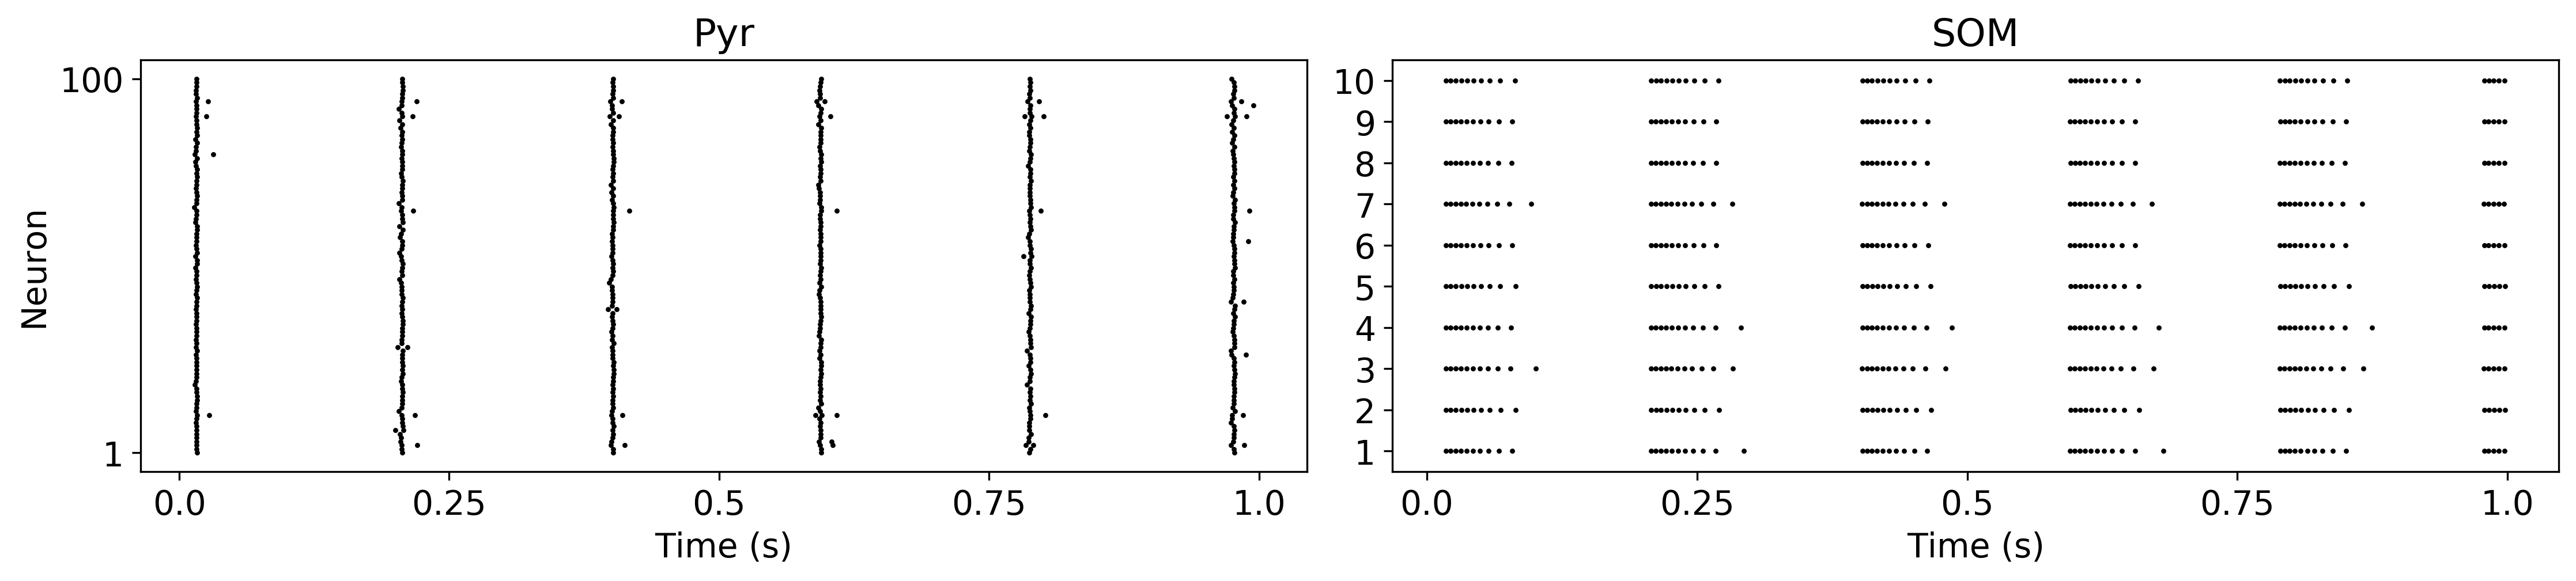

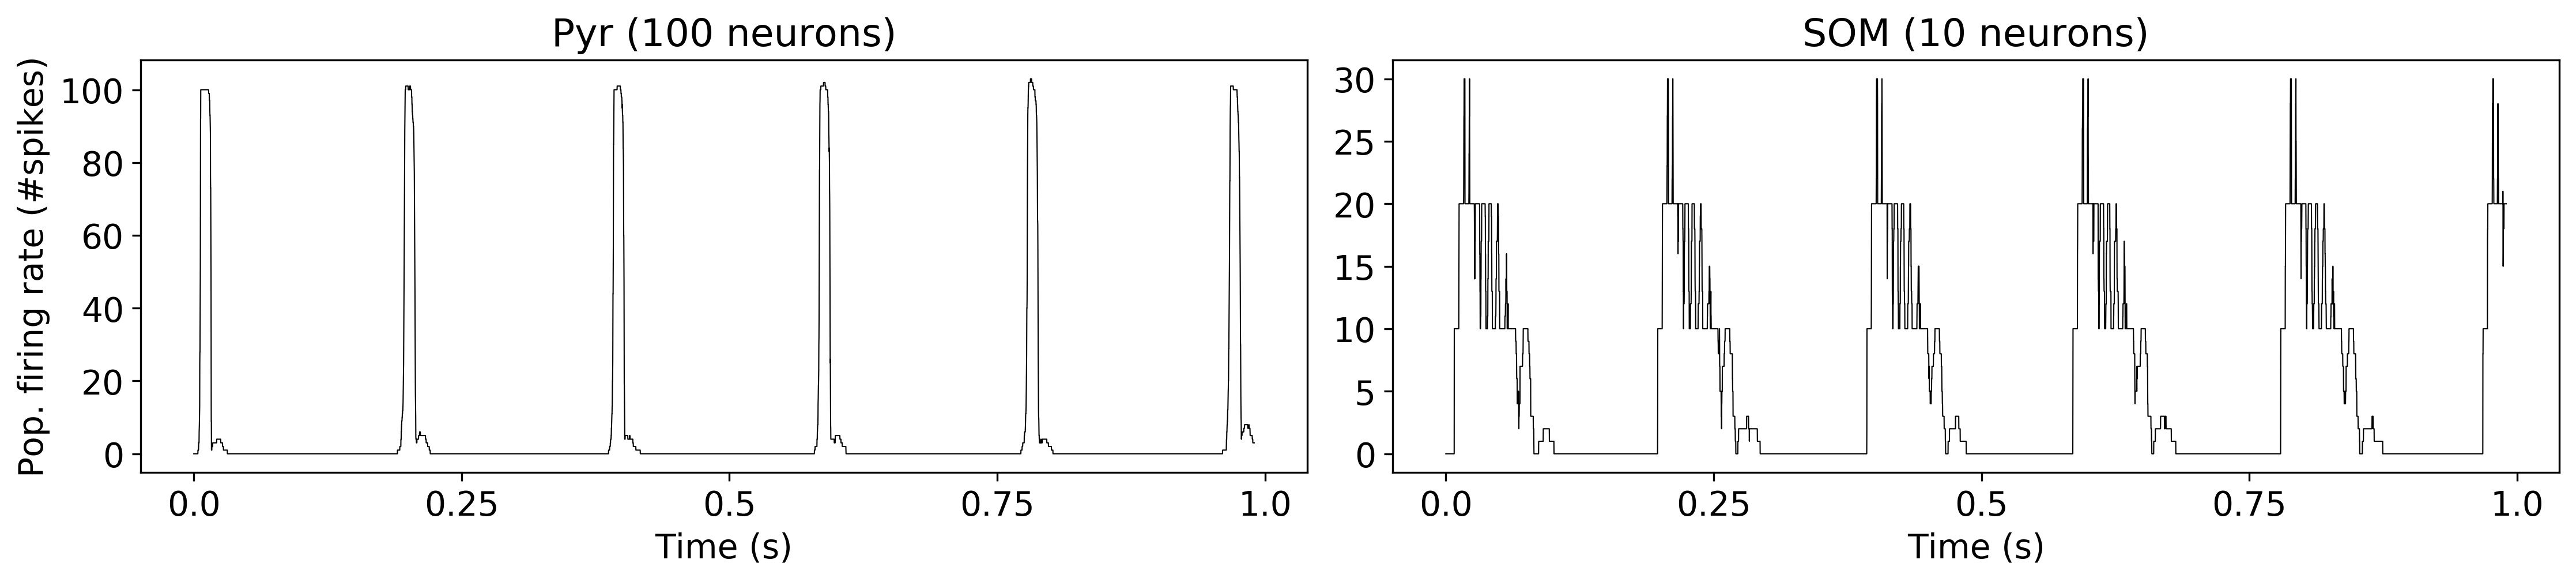

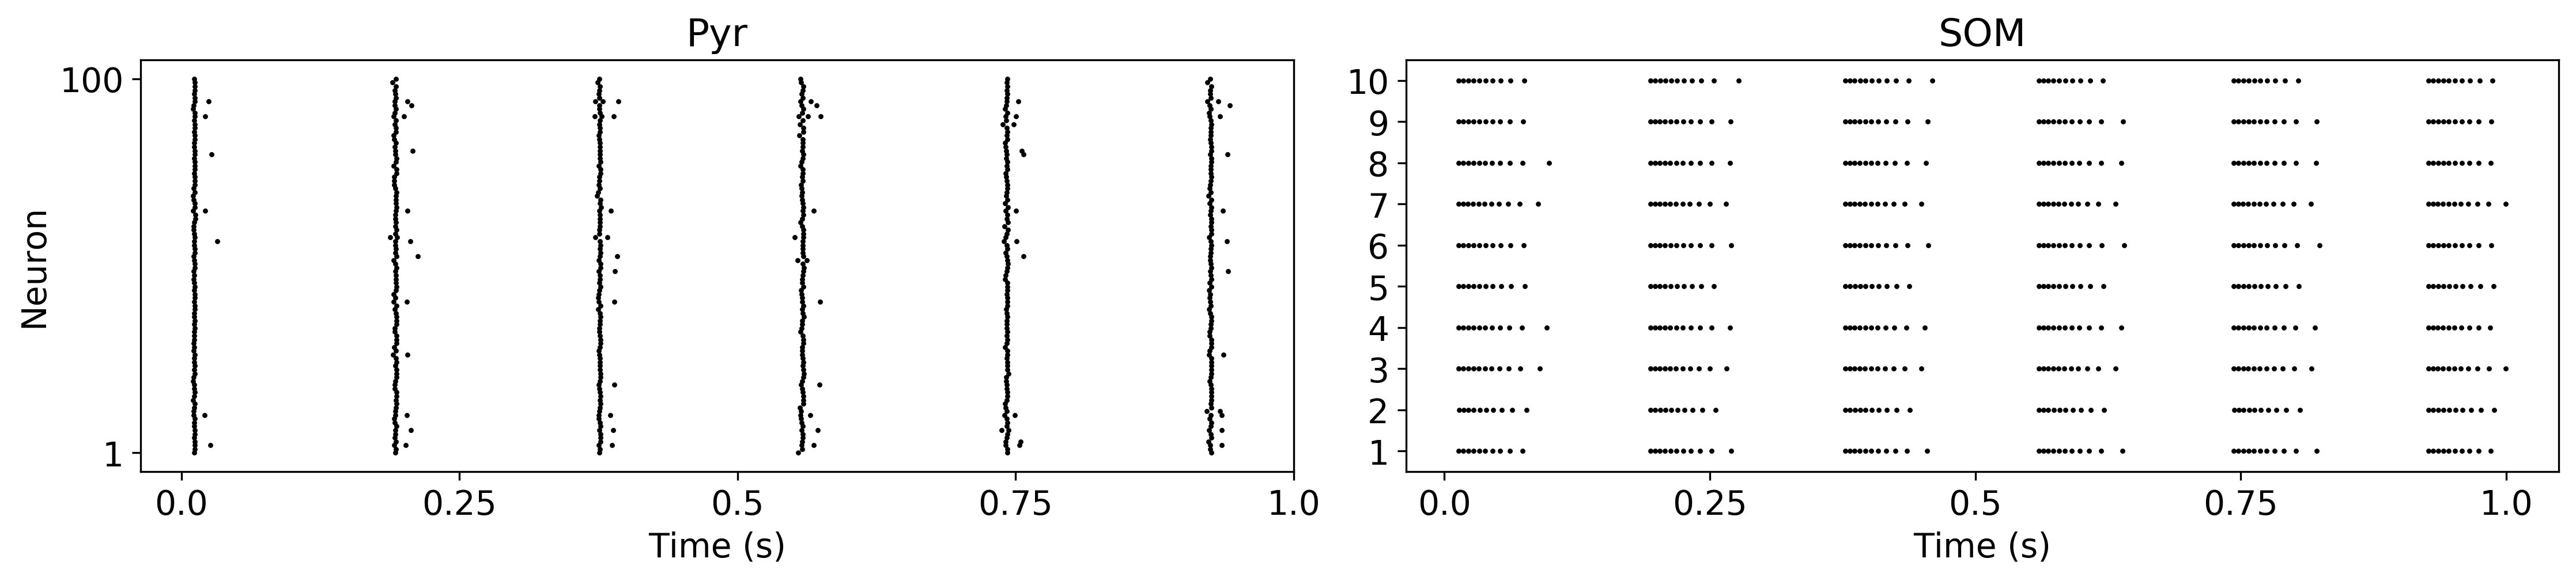

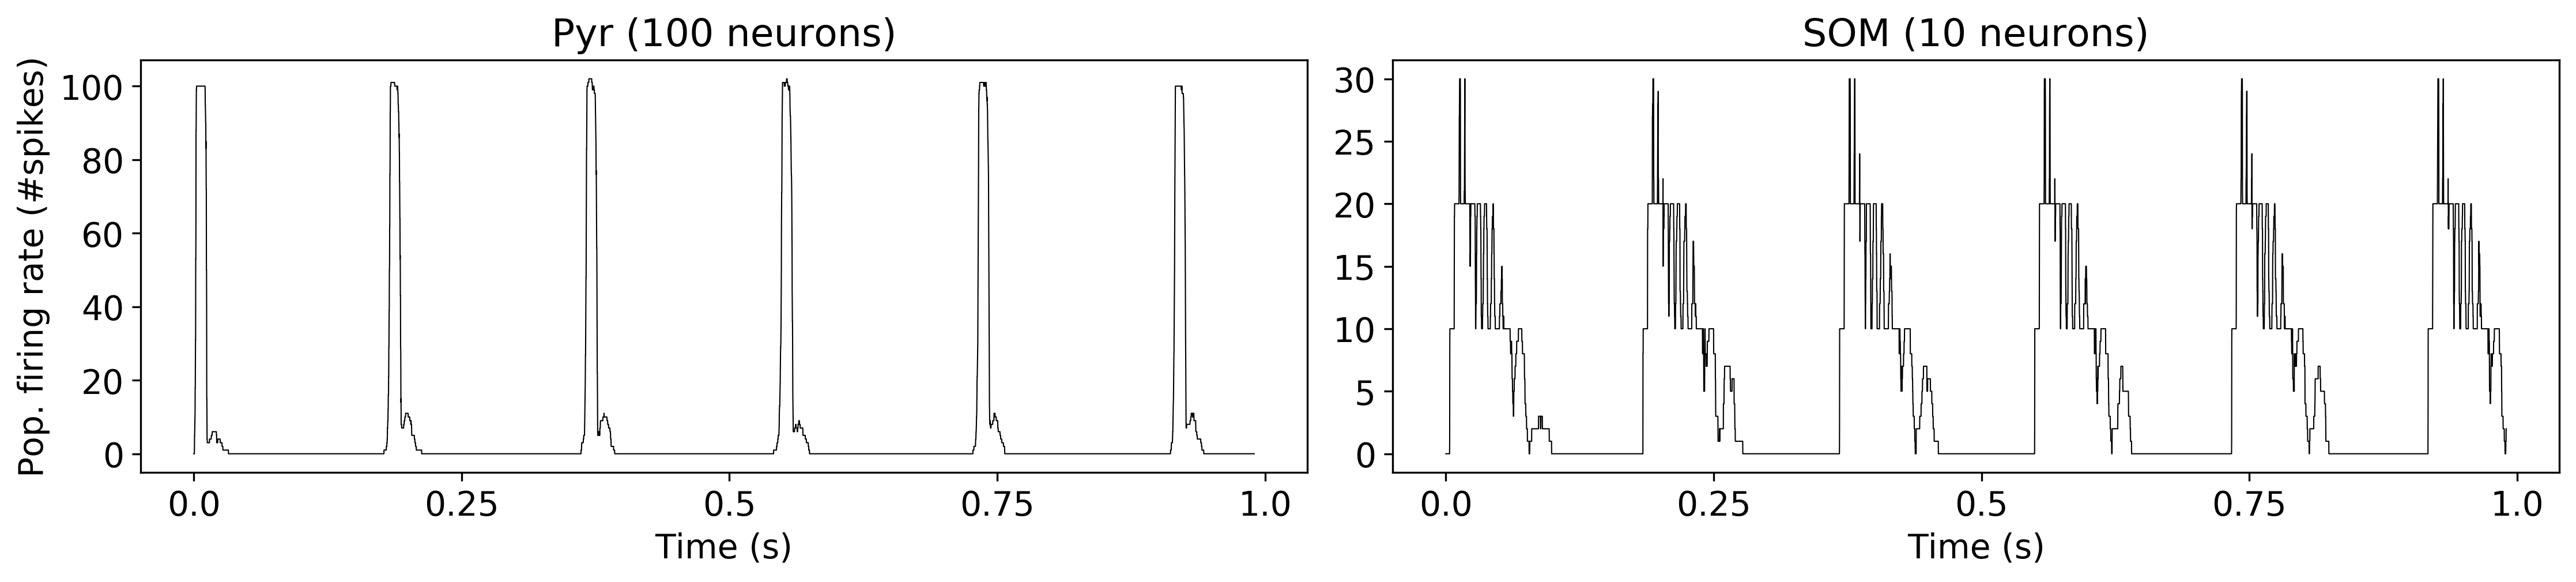

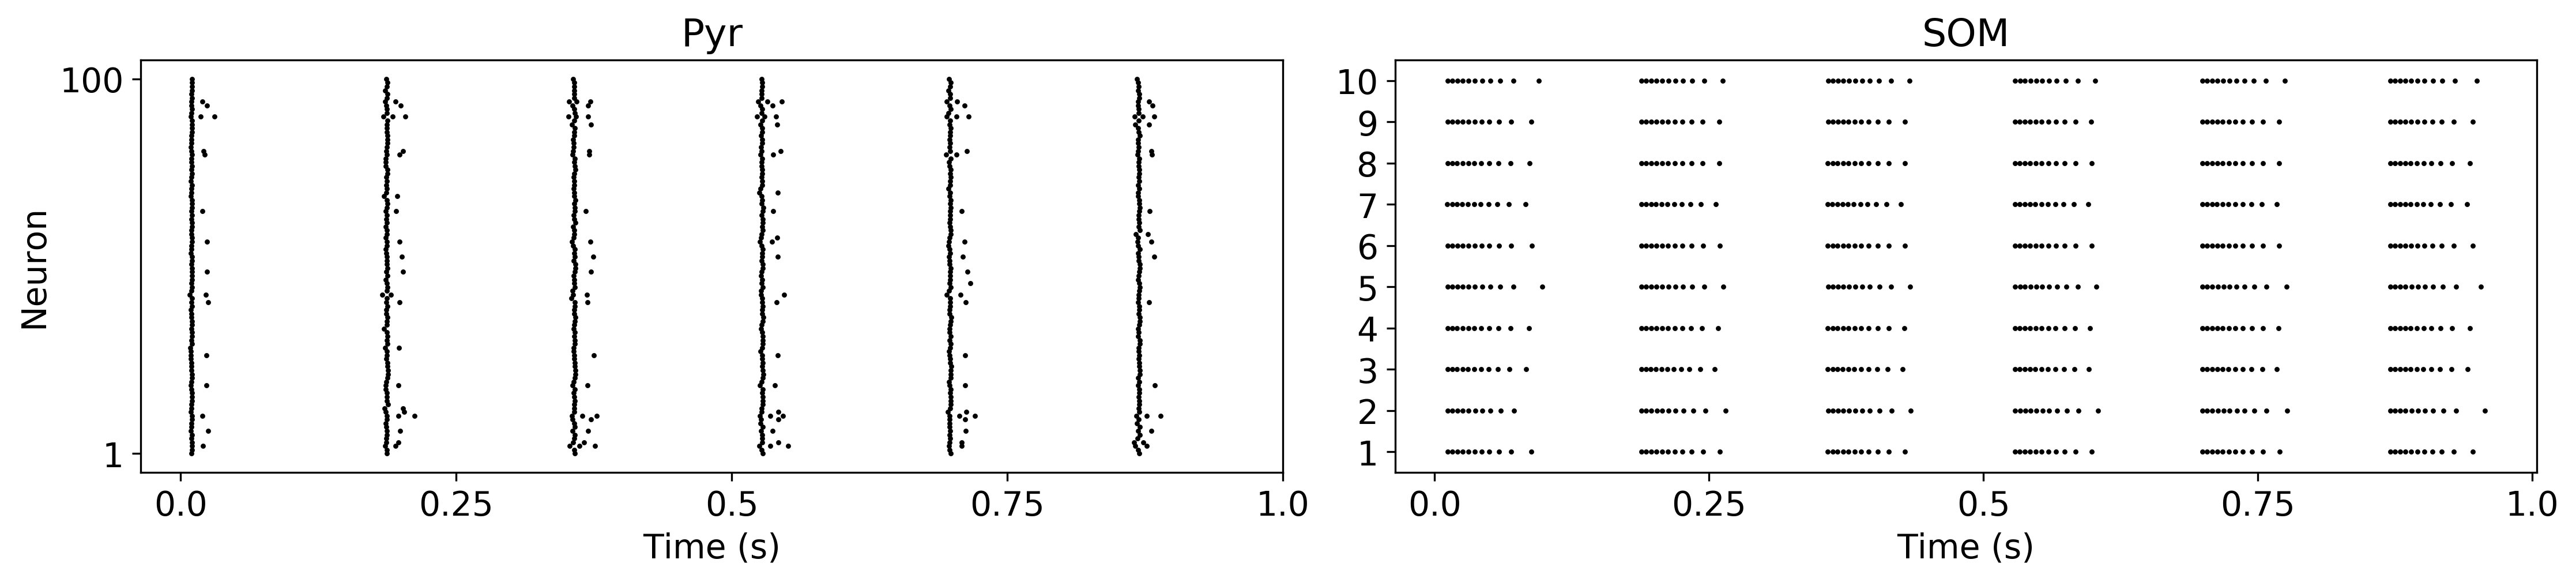

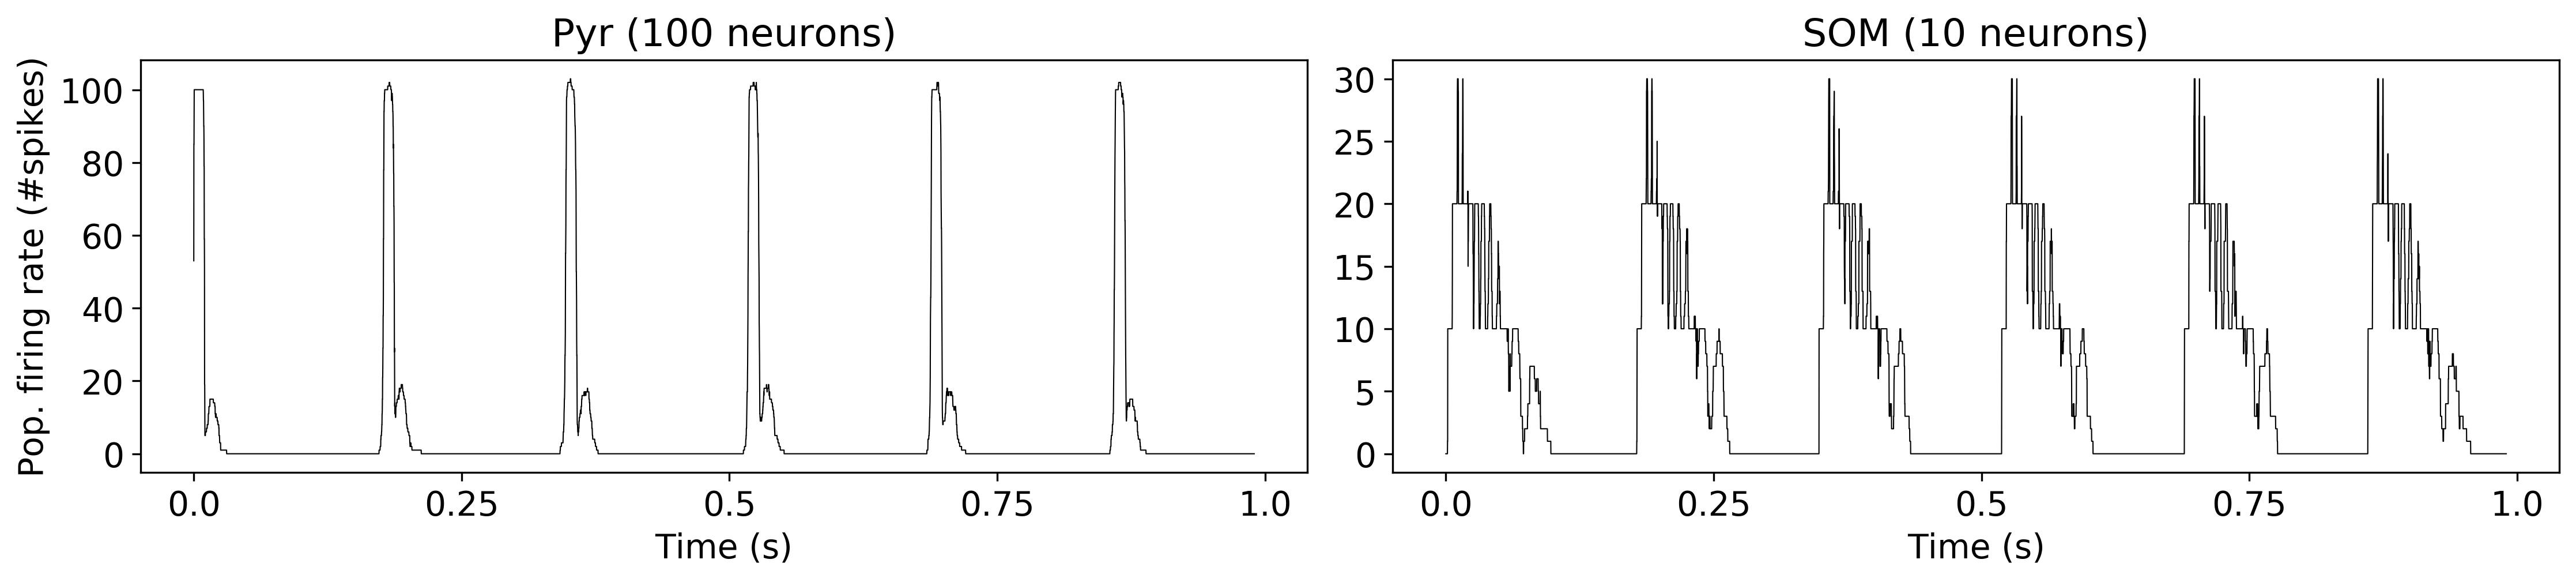

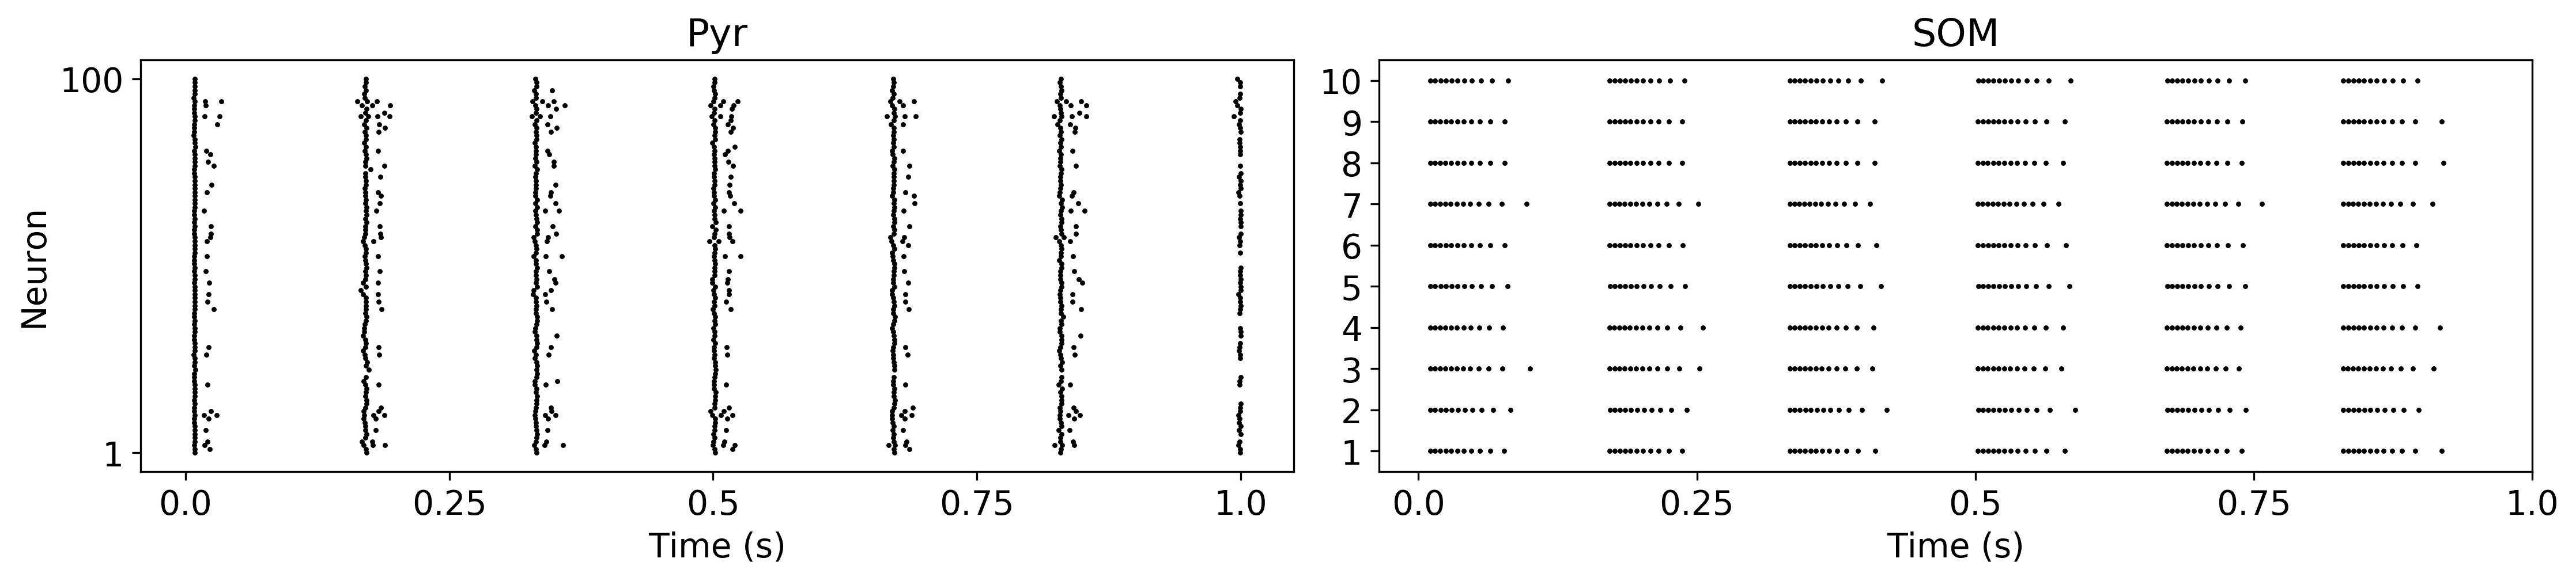

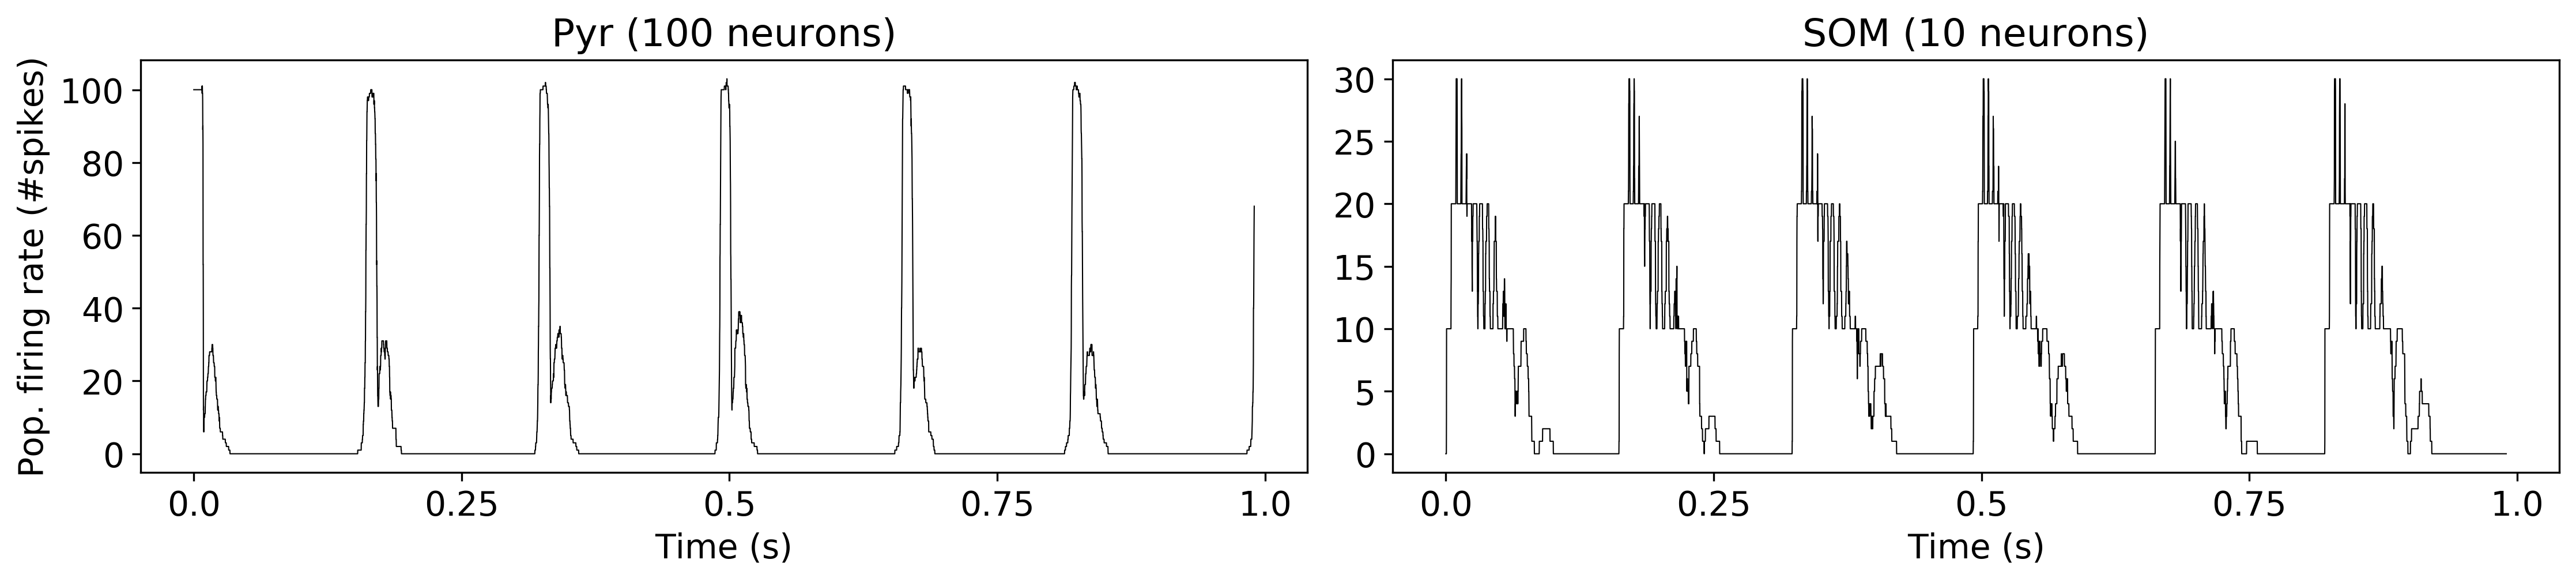

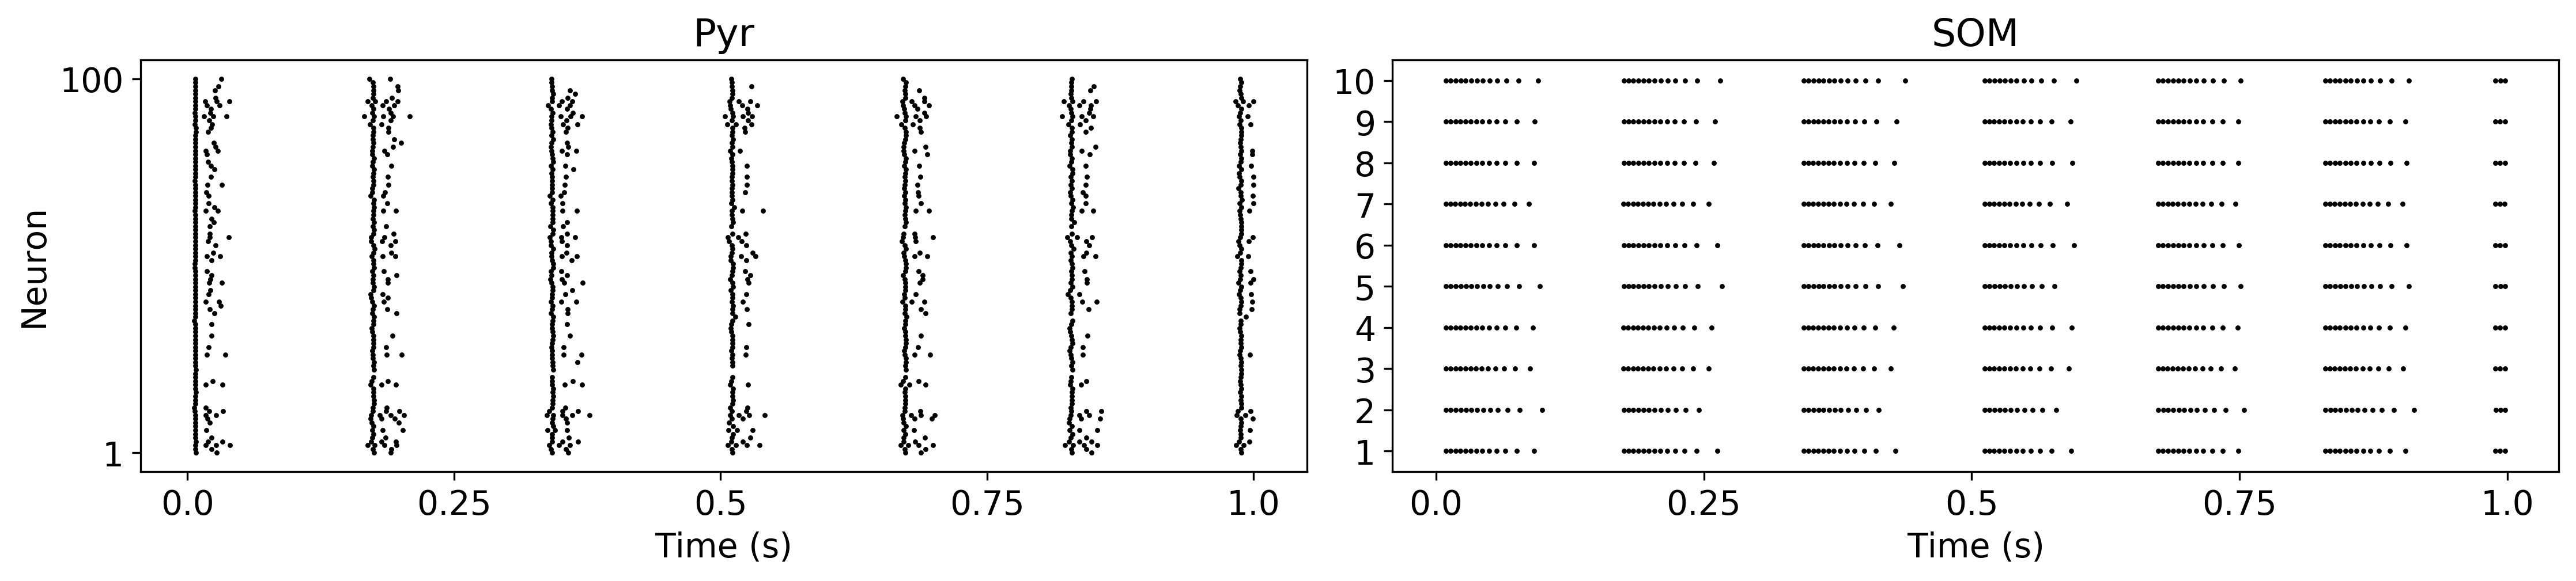

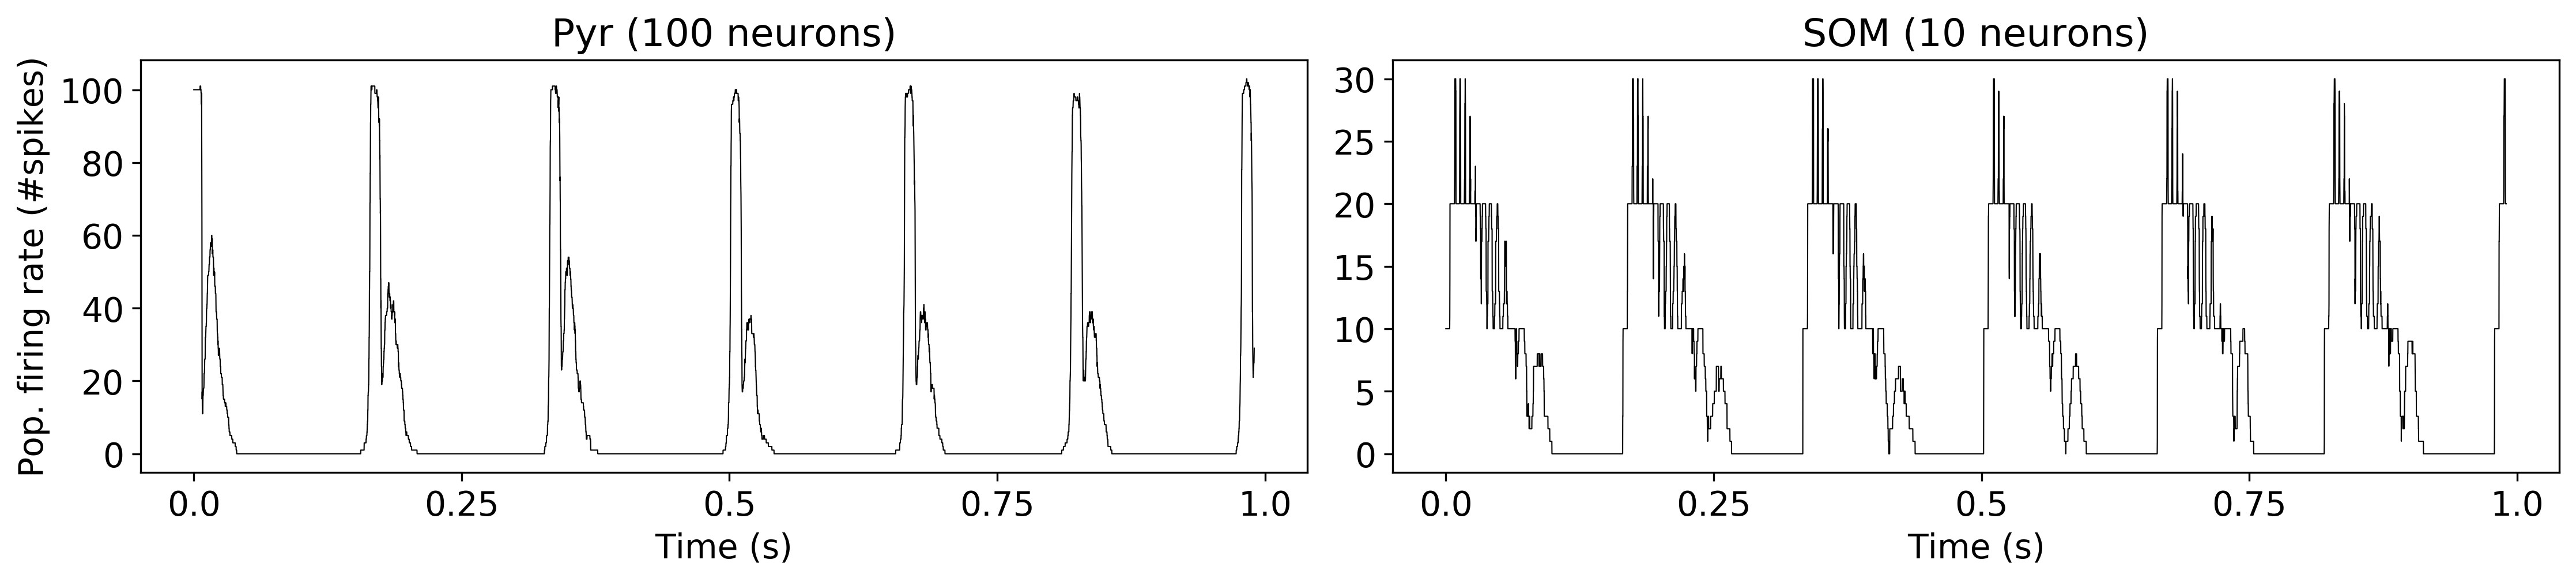

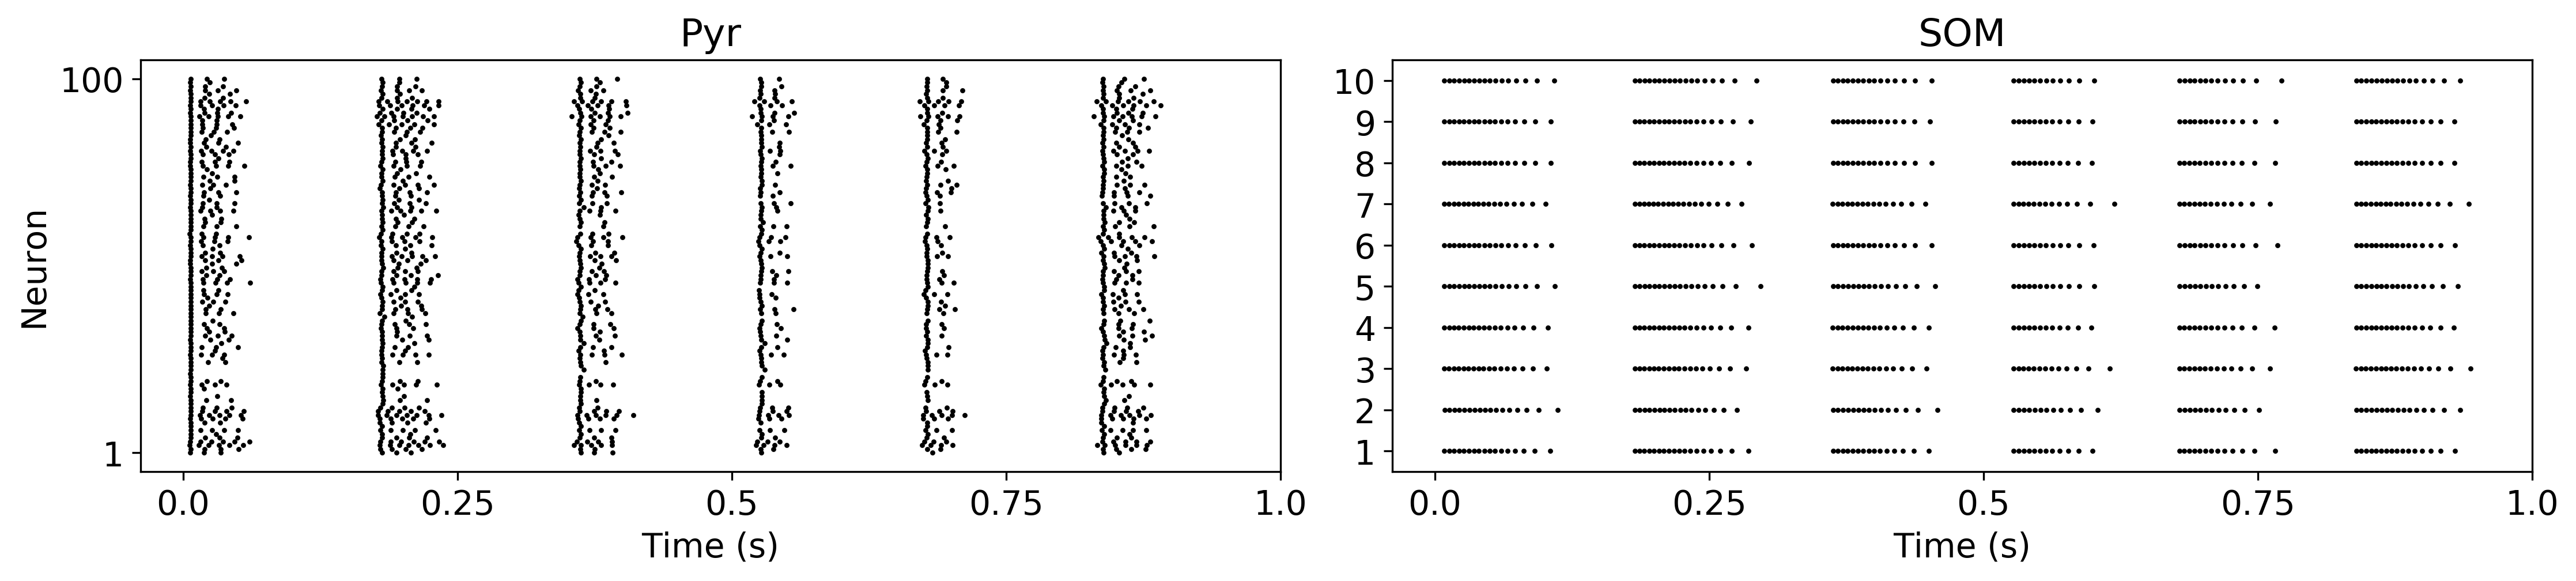

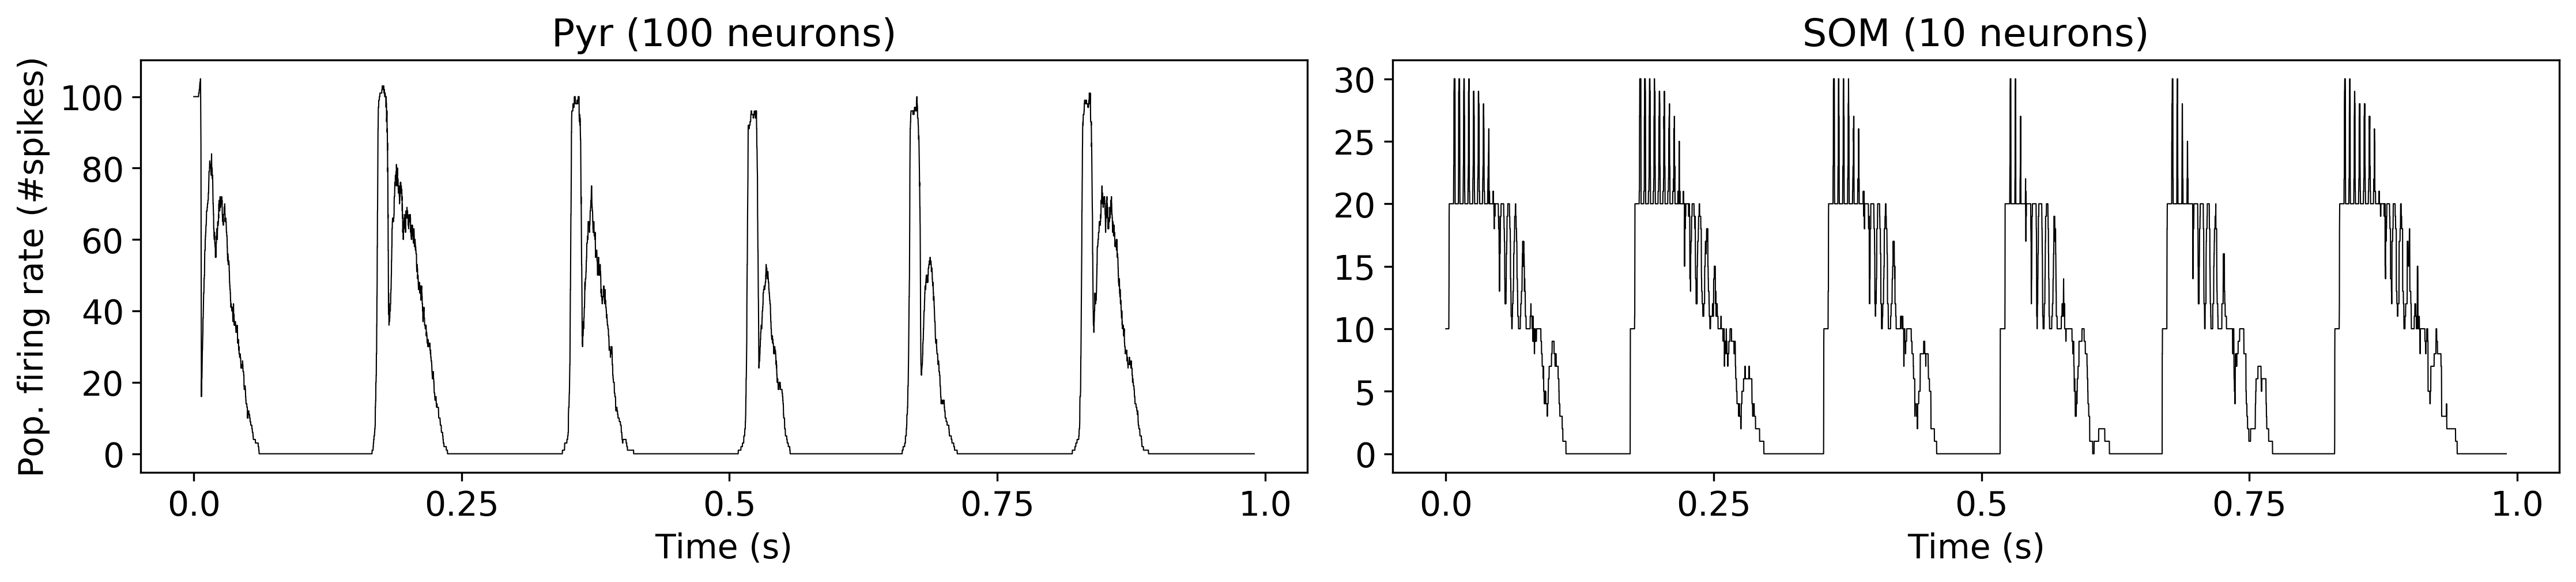

In [3]:
T_trial = 1000   # ms

net.reset(weights=True)

V = []
for n in [50,60,70,80,90,100]:
    
    net.reset(weights=False)
    V_tmp = []
    for t in np.arange(0, T_trial+dt, dt):
        V_tmp.append(np.mean(net.readout_Population(population='Pyr')))
        net.add_externalCurrent(population='Pyr', mean=500e-12, std=300e-12, N=n)
        net.advance()
        
    r = net.plot_rasters(time_limits=[], marker_size=5.)
    net.plot_firingRates(type='average', time_window=10e-3)
    V.append(V_tmp)

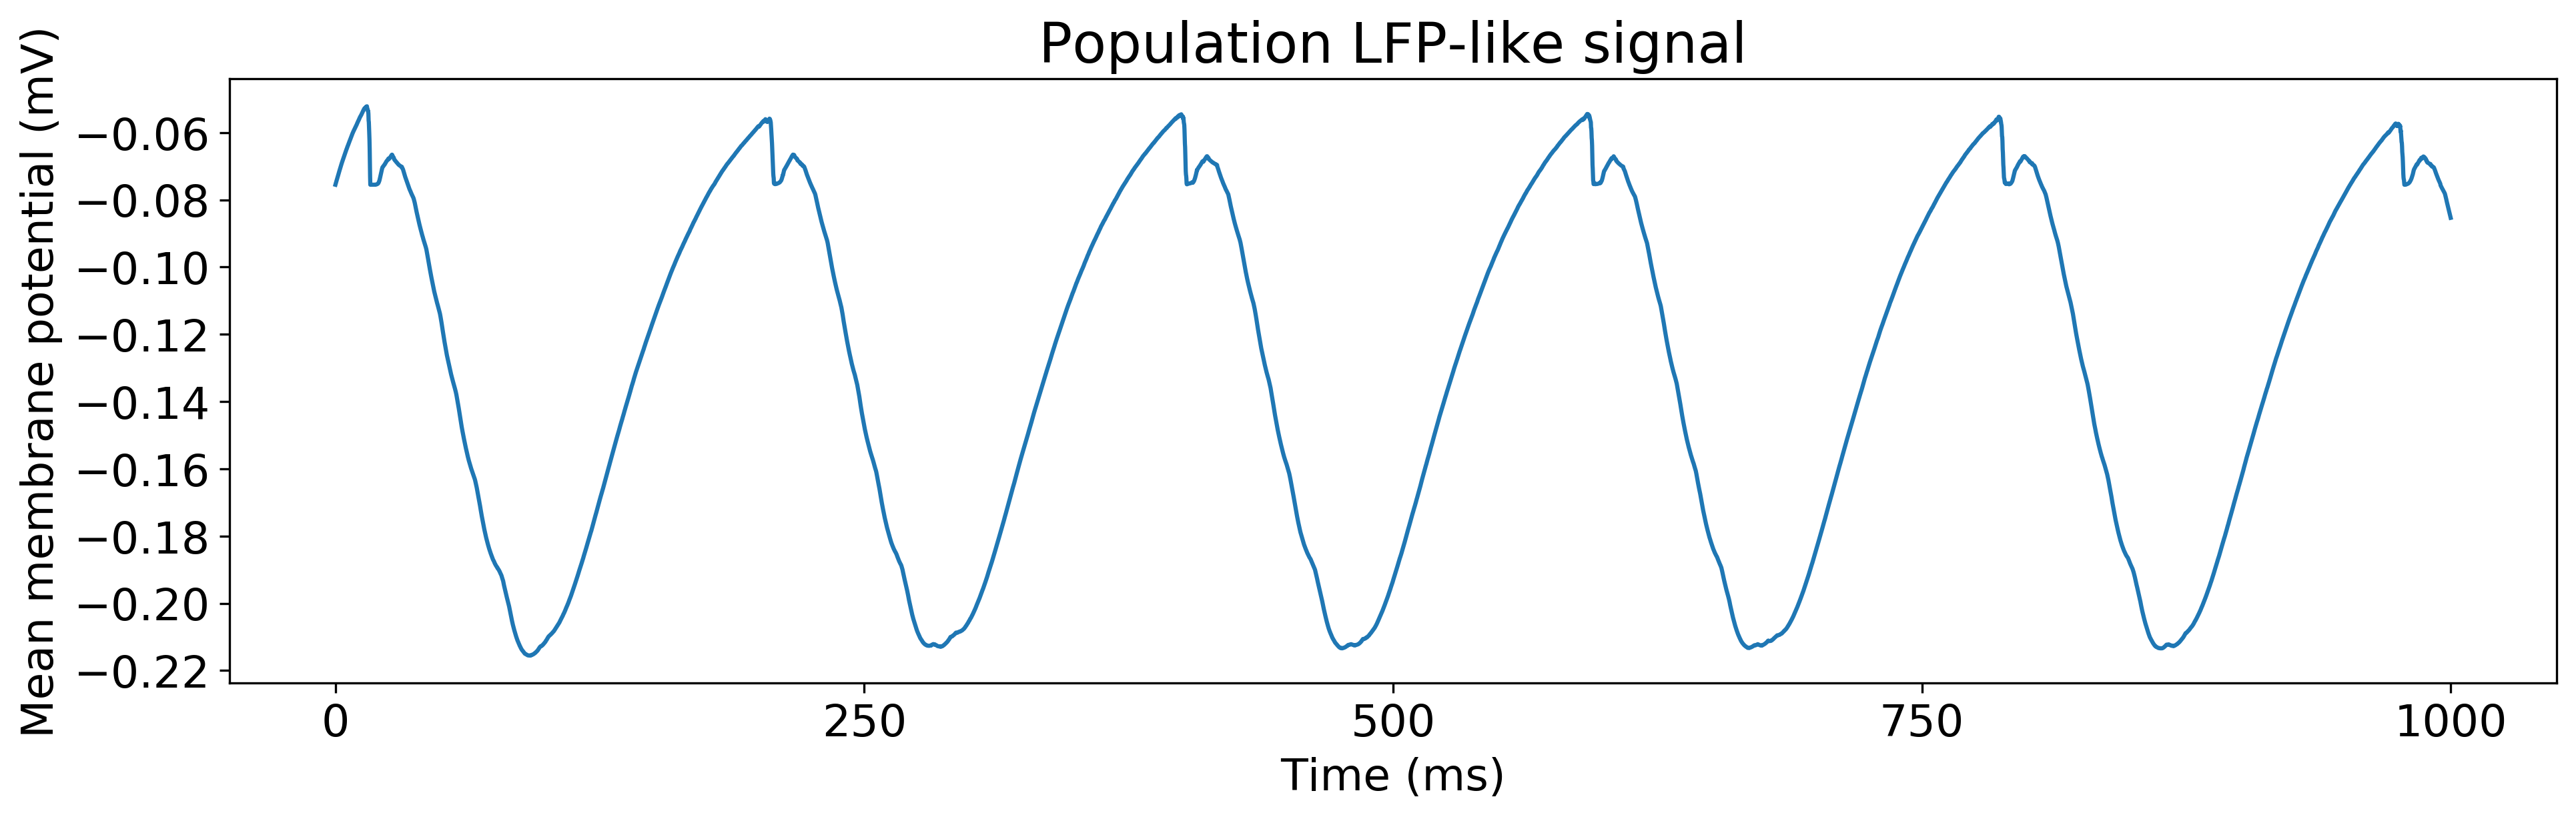

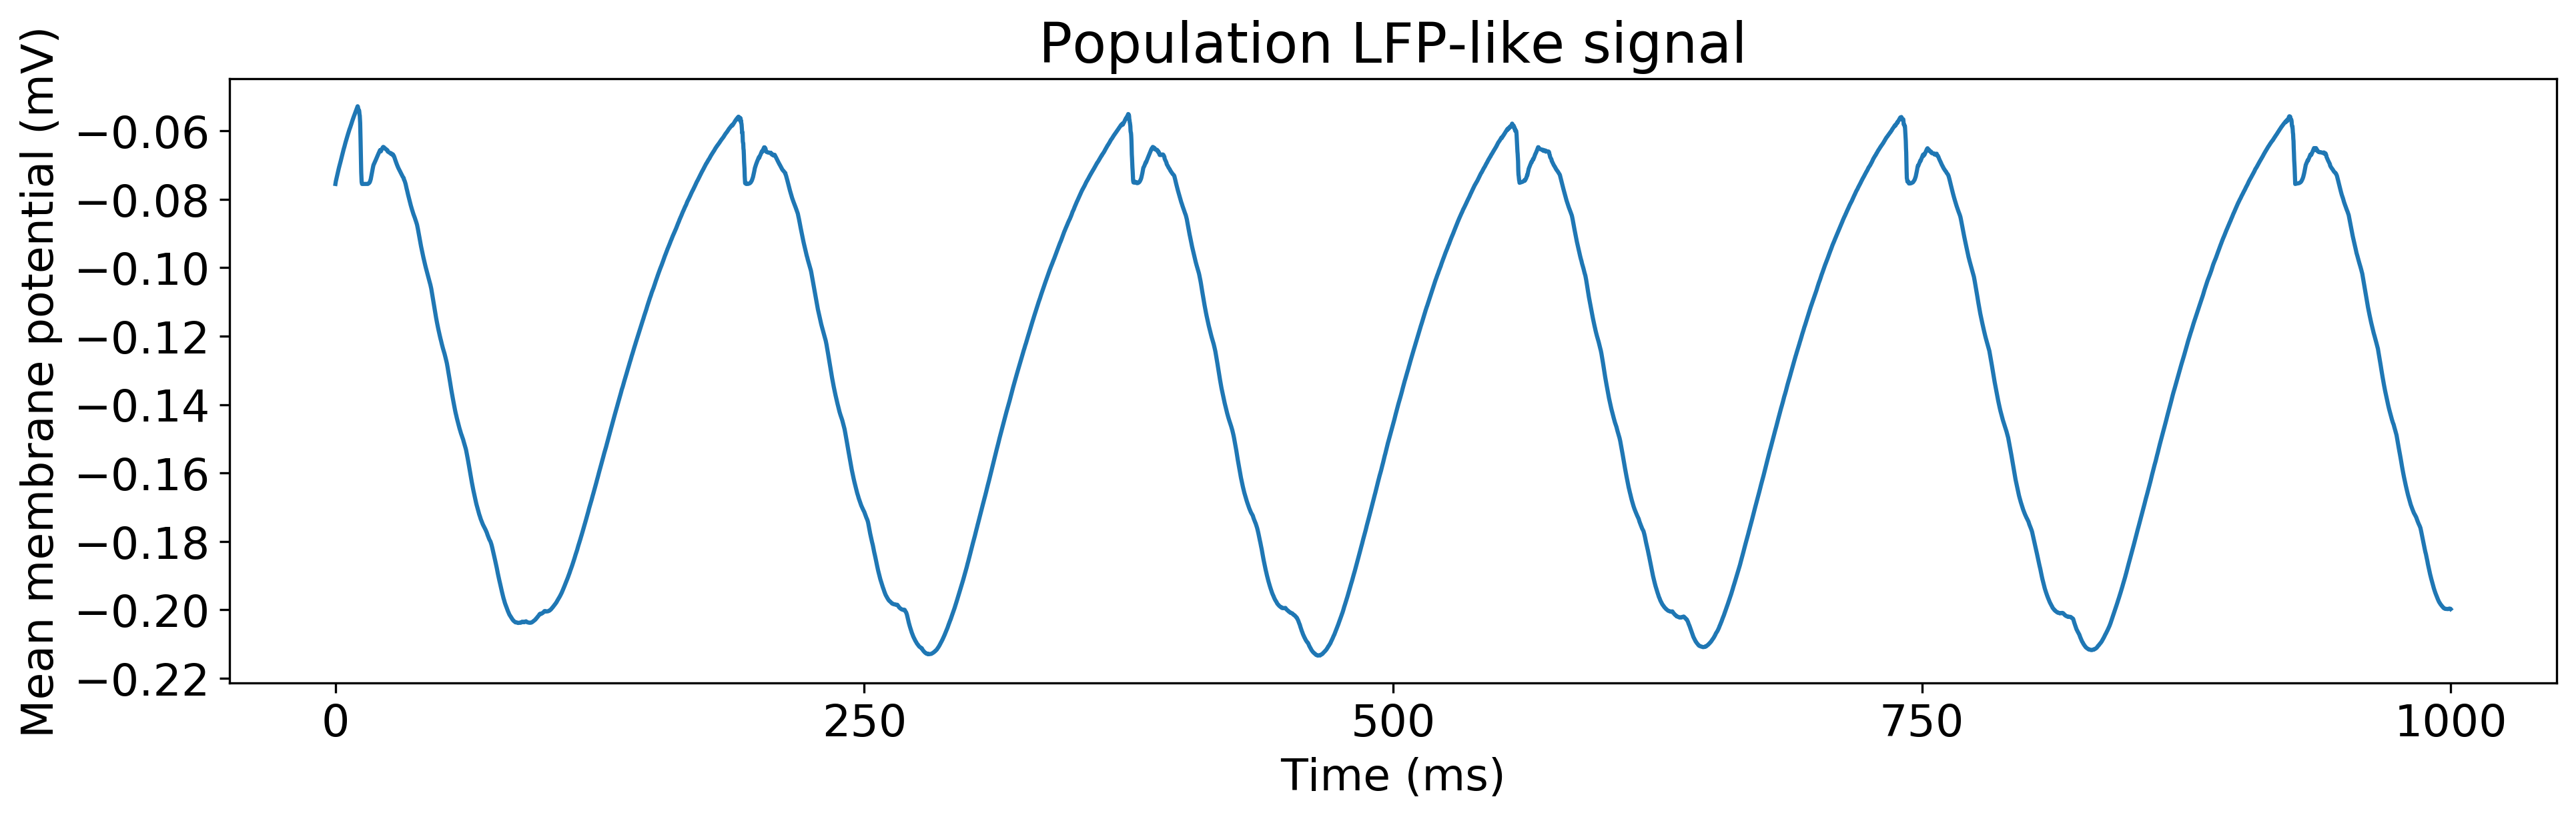

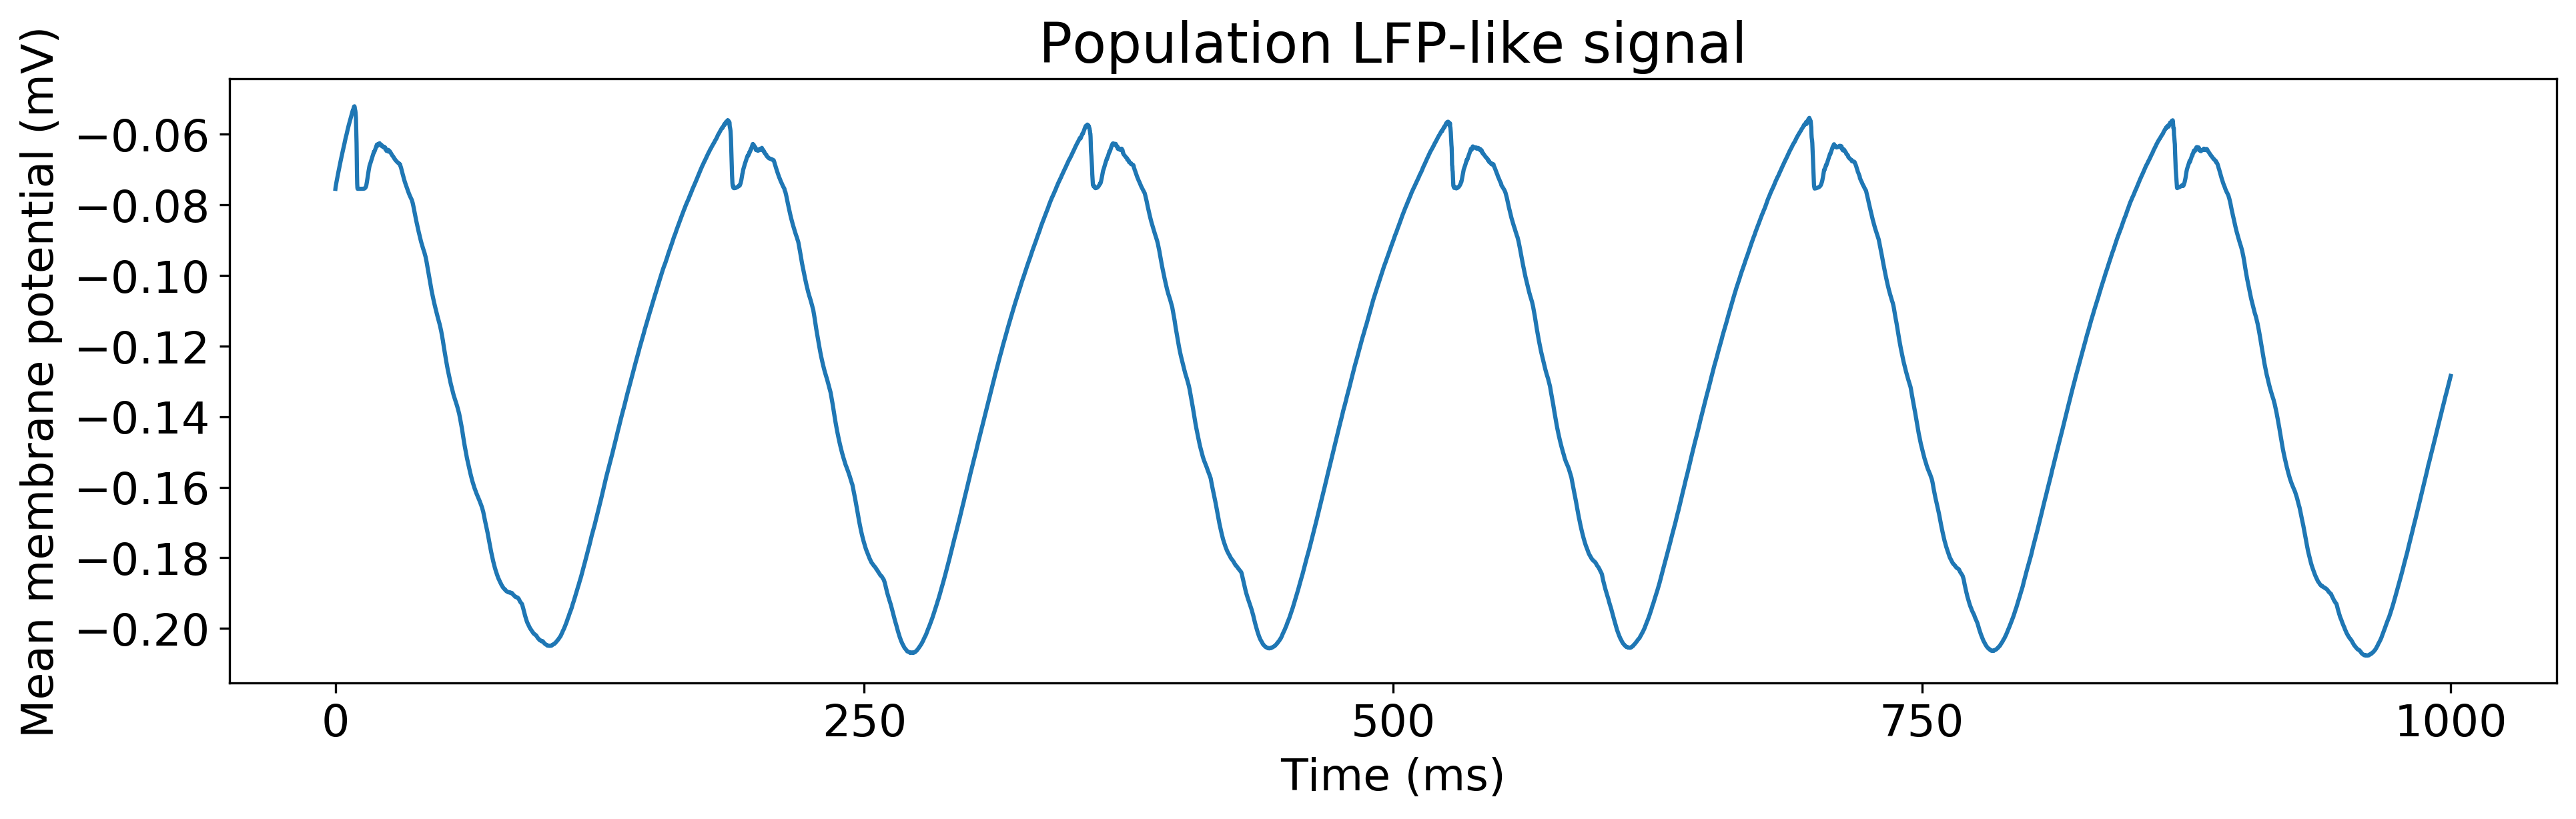

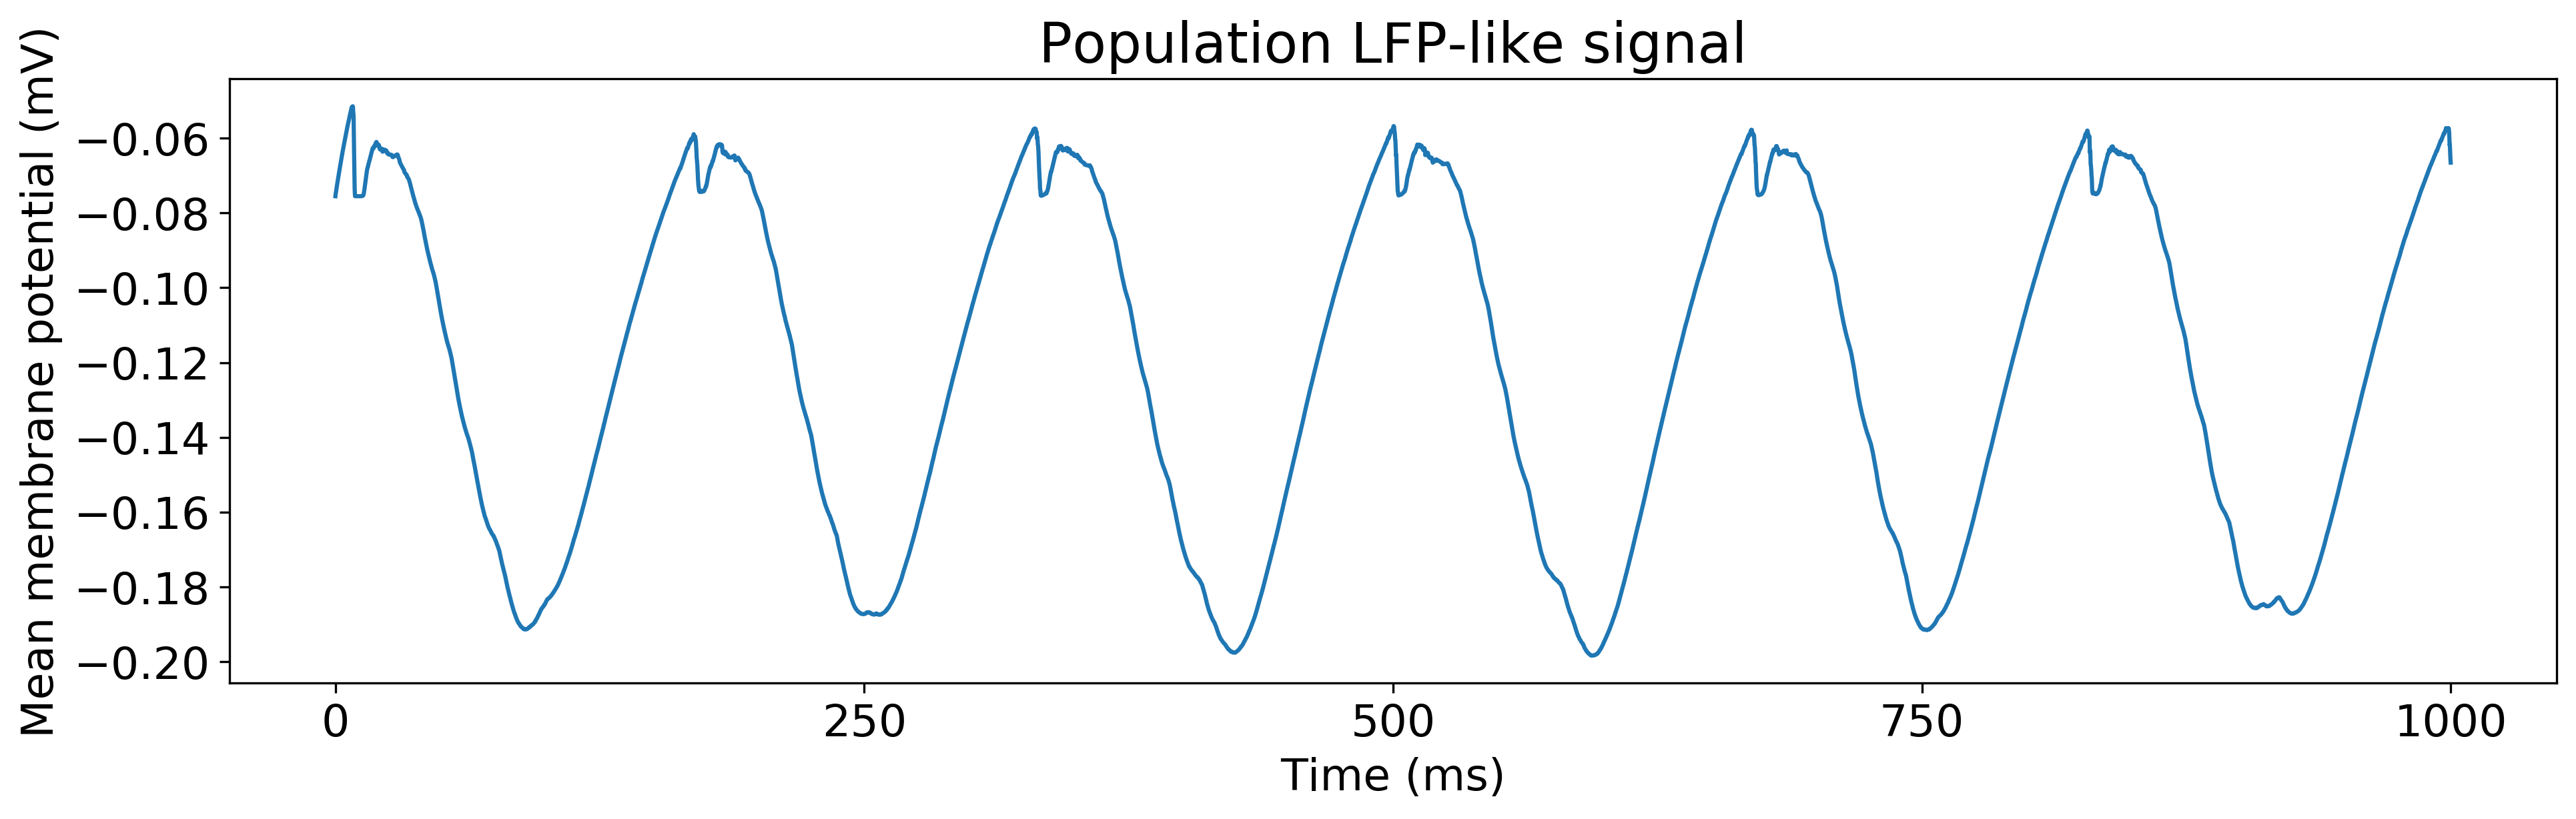

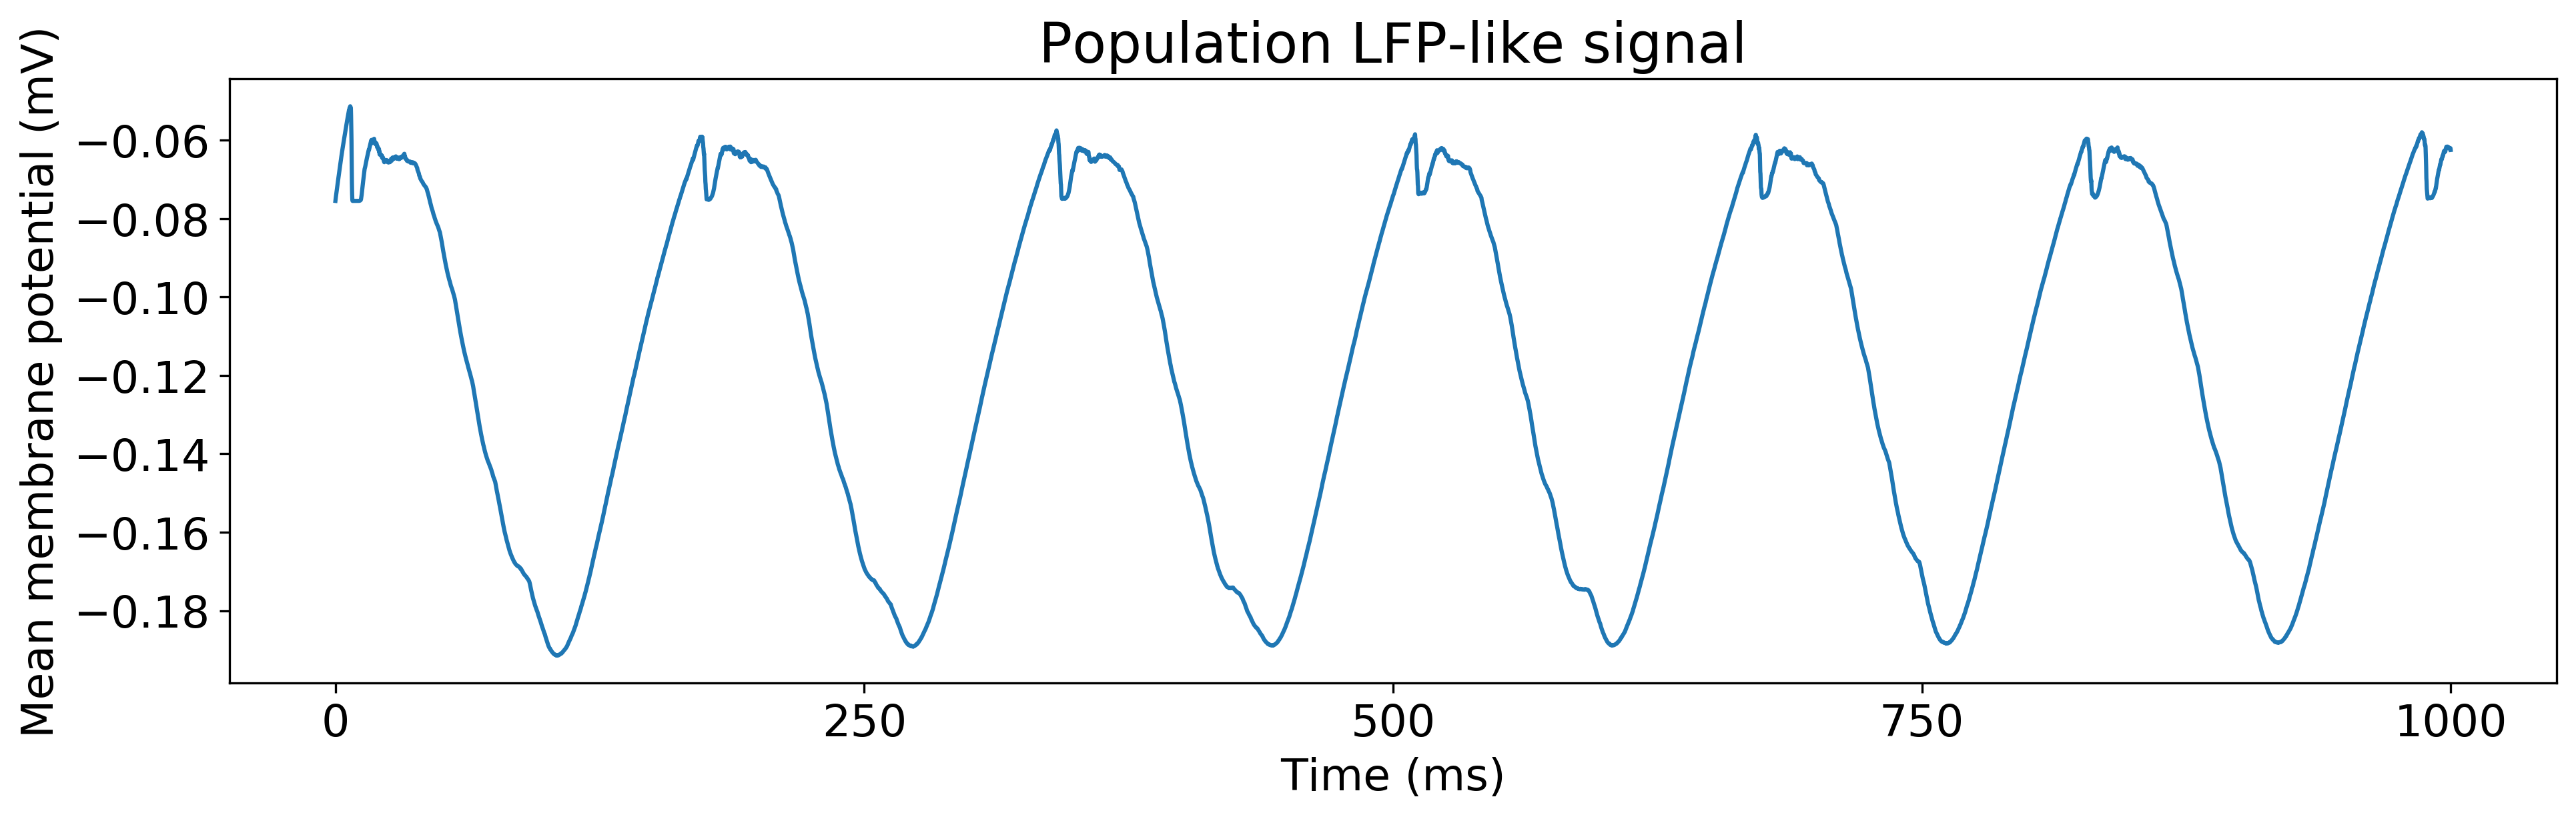

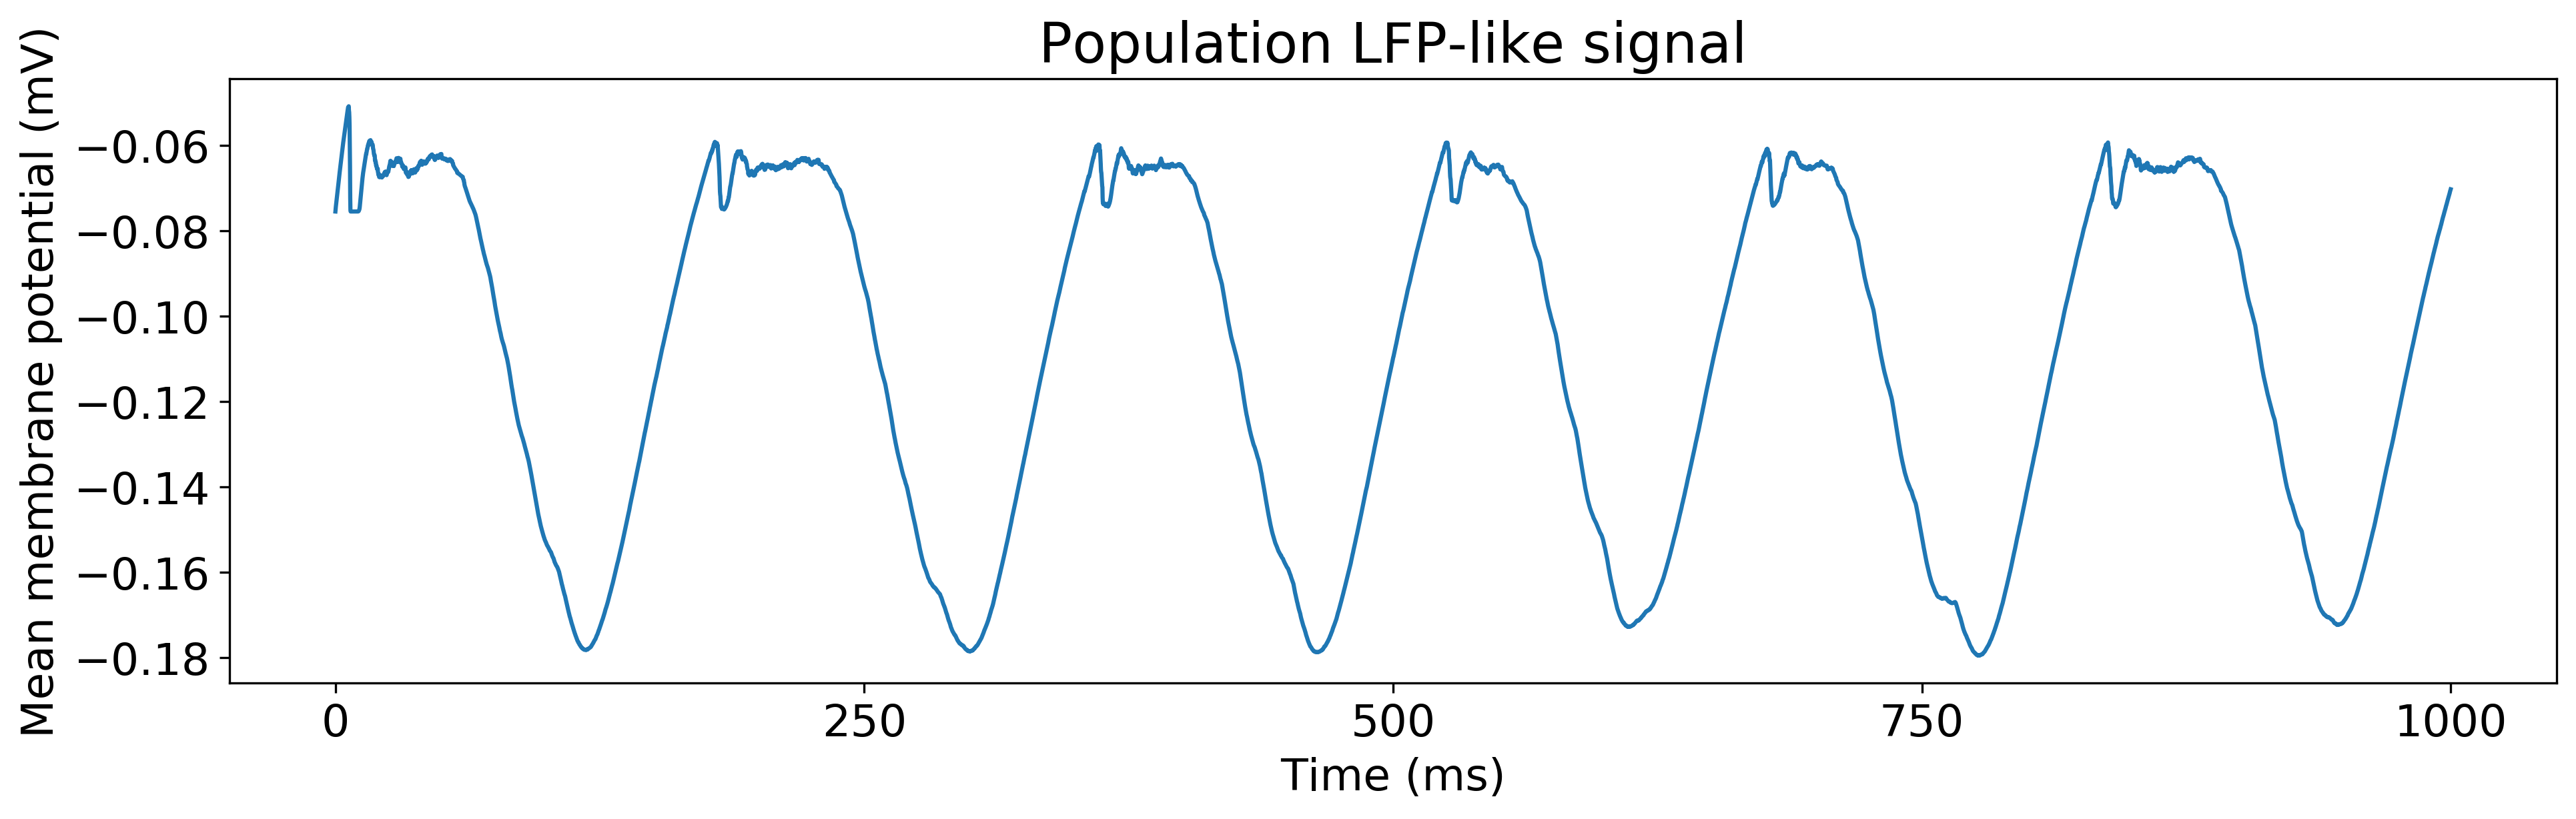

In [4]:
# LFP as the mean of population' membrane potential
for i in range(6):
    plt.figure(figsize=(15,4), dpi=300)
    plt.plot(V[i])
    plt.title('Population LFP-like signal', fontsize=20)
    plt.xticks(np.linspace(0, int(T_trial/dt), 5), np.linspace(0, T_trial, 5, dtype=int), fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Time (ms)', fontsize=16)
    plt.ylabel('Mean membrane potential (mV)', fontsize=16)
    plt.show()

C:\Users\adria\Miniconda3\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 100000 is greater than input length  = 9001, using nperseg = 9001
  .format(nperseg, input_length))


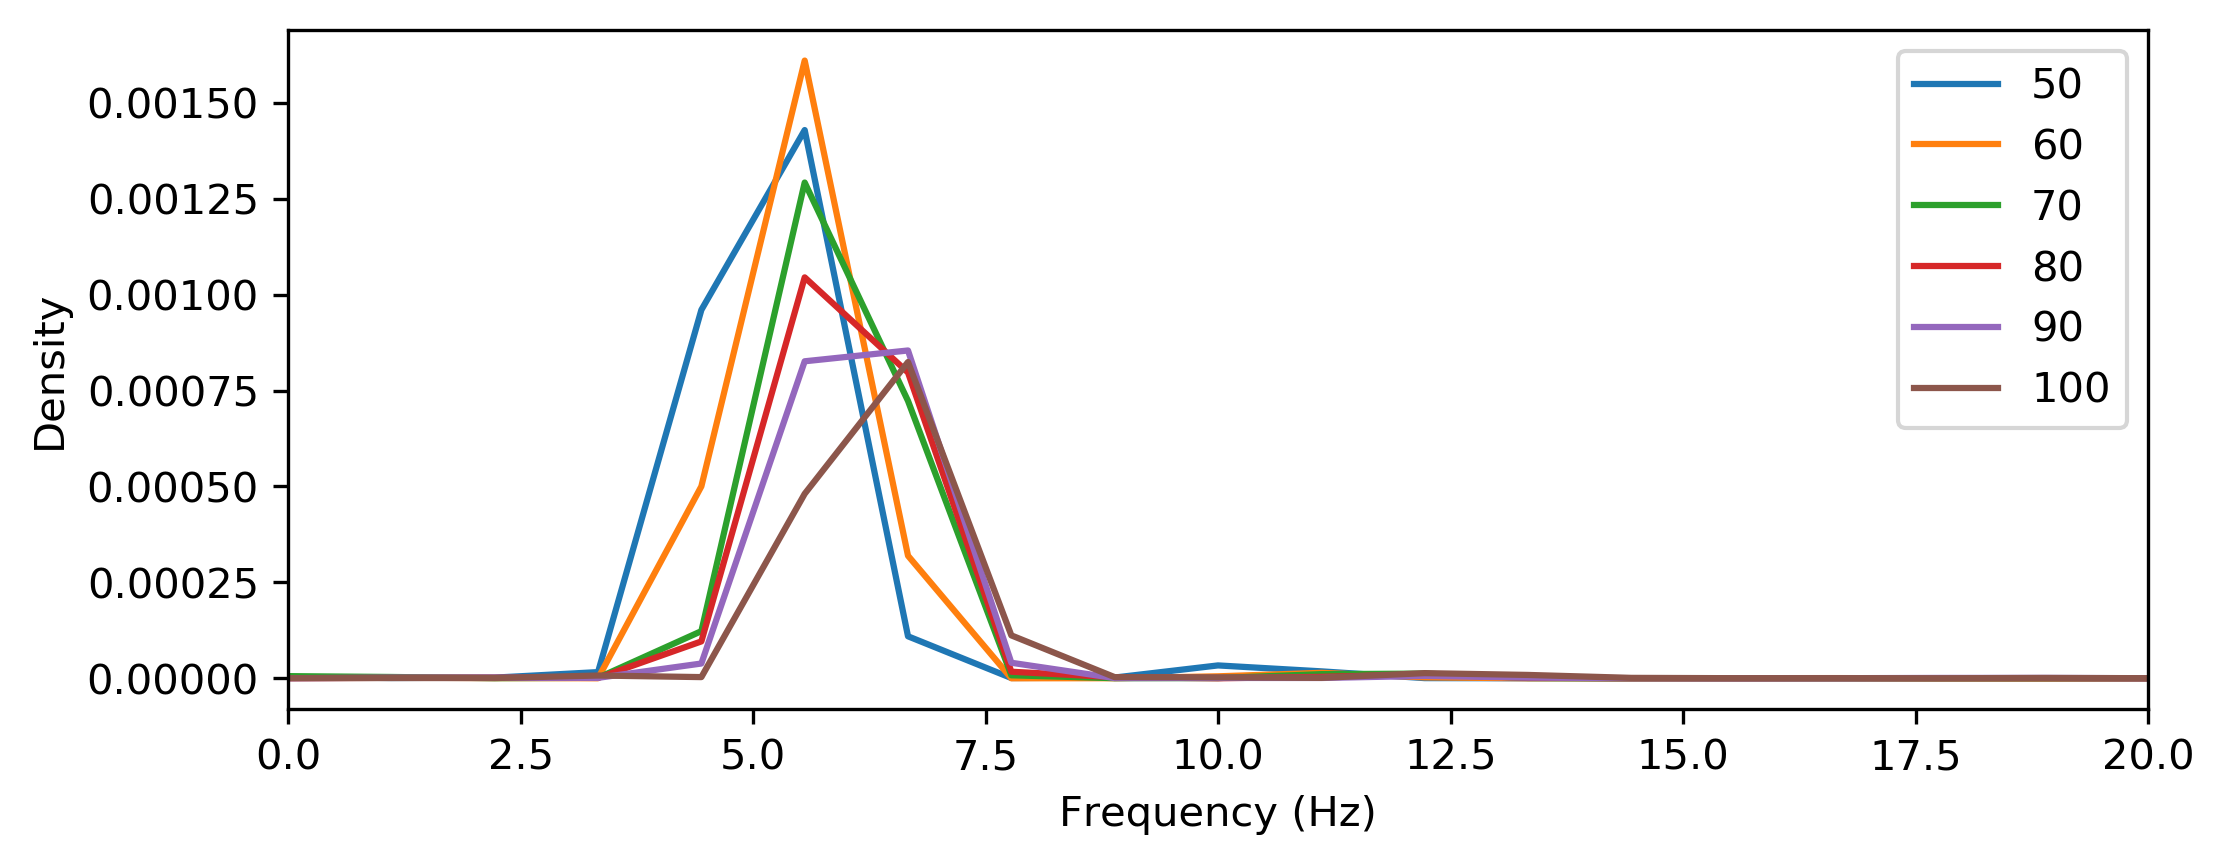

In [5]:
import scipy.signal as sc

plt.figure(figsize=(8,3), dpi=300)

for i in range(6):
    psd = sc.welch(V[i][1000:], fs=10000, nperseg=100000)
    plt.plot(psd[0], psd[1], label=str(50+i*10))

plt.xlim(0,20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Density')
plt.legend()
plt.show()